# Numpy -  multidimensional data arrays

This lecture is a reduced version compiled from the following materials:

    J.R. Johansson (jrjohansson at gmail.com)
    The latest version of this IPython notebook lecture is available at http://github.com/jrjohansson/scientific-python-lectures.
    The other notebooks in this lecture series are indexed at http://jrjohansson.github.io.
    
    https://diveintopython3.problemsolving.io/
    
    https://www.dataquest.io/blog/jupyter-notebook-tutorial/

In [1]:
# what is this line all about?!? Patience, young apprentice.
%matplotlib inline
import matplotlib.pyplot as plt

## Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` you need to import the module, using for example:

In [2]:
from numpy import *

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [3]:
# a vector: the argument to the array function is a Python list
v = array([1,2,3,4])

v

array([1, 2, 3, 4])

In [4]:
# a matrix: the argument to the array function is a nested Python list
M = array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [5]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [6]:
v.shape

(4,)

In [7]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [8]:
M.size

4

So far the `numpy.ndarray` looks awfully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [9]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [10]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [11]:
M = array([[1, 2], [3, 4]], dtype=complex)

M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange

In [12]:
# create a range

x = arange(0, 10, 1) # arguments: start, stop, step

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
x = arange(-1, 1, 0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### linspace and logspace

In [14]:
# using linspace, both end points ARE included
linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [15]:
logspace(0, 10, 10, base=e)

array([1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
       8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
       7.25095809e+03, 2.20264658e+04])

#### mgrid

In [16]:
x, y = mgrid[0:5, 0:5] # similar to meshgrid in MATLAB

In [17]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [18]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### random data

In [19]:
from numpy import random

In [20]:
# uniform random numbers in [0,1]
random.rand(5,5)

array([[0.07945421, 0.78573343, 0.33271911, 0.53638021, 0.40439918],
       [0.43031906, 0.45936808, 0.52413807, 0.42243063, 0.69526915],
       [0.26253662, 0.61590811, 0.82225934, 0.01599924, 0.39987459],
       [0.48019688, 0.73780471, 0.64593735, 0.35012896, 0.30717599],
       [0.30901266, 0.89184986, 0.0972742 , 0.23187844, 0.30208874]])

In [21]:
# standard normal distributed random numbers
random.randn(5,5)

array([[-1.01107618,  1.93574086,  0.89123559, -0.03298653,  1.10017663],
       [-0.84271787,  0.35304464, -1.58390601,  0.44777968,  0.14659907],
       [ 0.7180722 , -0.32786412,  1.39428716,  0.47850598,  1.53210344],
       [ 0.02014233, -0.82002794, -0.8583733 ,  0.94661556,  1.22673202],
       [-0.82166708,  0.67381733,  0.66780419,  0.14211478, -0.61300717]])

#### diag

In [22]:
# a diagonal matrix
diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [23]:
# diagonal with offset from the main diagonal
diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### zeros and ones

In [24]:
zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [25]:
ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## Manipulating arrays

### Indexing

We can index elements in an array using square brackets and indices:

In [26]:
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [27]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

(4+0j)

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [28]:
M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [29]:
M[1]

array([3.+0.j, 4.+0.j])

The same thing can be achieved with using `:` instead of an index: 

In [30]:
M[1,:] # row 1

array([3.+0.j, 4.+0.j])

In [31]:
M[:,1] # column 1

array([2.+0.j, 4.+0.j])

We can assign new values to elements in an array using indexing:

In [32]:
M[0,0] = 1

In [33]:
M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [34]:
# also works for rows and columns
M[1,:] = 0
M[:,2] = -1

IndexError: index 2 is out of bounds for axis 1 with size 2

In [35]:
M

array([[1.+0.j, 2.+0.j],
       [0.+0.j, 0.+0.j]])

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [36]:
A = array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [37]:
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [38]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [39]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [40]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [41]:
A[:3] # first three elements

array([ 1, -2, -3])

In [42]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [43]:
A = array([1,2,3,4,5])

In [44]:
A[-1] # the last element in the array

5

In [45]:
A[-3:] # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [46]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [47]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [48]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [49]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [50]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 22, 34])

We can also use index masks: If the index mask is an Numpy array of data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element: 

In [51]:
B = array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [52]:
row_mask = array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [53]:
# same thing
row_mask = array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [54]:
x = arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [55]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [56]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [57]:
v1 = arange(0, 5)

In [58]:
v1 * 2

array([0, 2, 4, 6, 8])

In [59]:
v1 + 2

array([2, 3, 4, 5, 6])

In [60]:
A * 2, A + 2

(array([[ 0,  2,  4,  6,  8],
        [20, 22, 24, 26, 28],
        [40, 42, 44, 46, 48],
        [60, 62, 64, 66, 68],
        [80, 82, 84, 86, 88]]), array([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26],
        [32, 33, 34, 35, 36],
        [42, 43, 44, 45, 46]]))

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [61]:
A * A # element-wise multiplication

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [62]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [63]:
A.shape, v1.shape

((5, 5), (5,))

In [64]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [65]:
dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [66]:
dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [67]:
dot(v1, v1)

30

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [68]:
M = matrix(A)
v = matrix(v1).T # make it a column vector

In [69]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [70]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [71]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [72]:
# inner product
v.T * v

matrix([[30]])

In [73]:
# with matrix objects, standard matrix algebra applies
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

If we try to add, subtract or multiply objects with incomplatible shapes we get an error:

In [74]:
v = matrix([1,2,3,4,5,6]).T

In [75]:
shape(M), shape(v)

((5, 5), (6, 1))

In [76]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.

### Array/Matrix transformations

Above we have used the `.T` to transpose the matrix object `v`. We could also have used the `transpose` function to accomplish the same thing. 

Other mathematical functions that transform matrix objects are:

In [77]:
C = matrix([[1j, 2j], [3j, 4j]])
C

matrix([[0.+1.j, 0.+2.j],
        [0.+3.j, 0.+4.j]])

In [78]:
conjugate(C)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Hermitian conjugate: transpose + conjugate

In [79]:
C.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

We can extract the real and imaginary parts of complex-valued arrays using `real` and `imag`:

In [80]:
real(C) # same as: C.real

matrix([[0., 0.],
        [0., 0.]])

In [81]:
imag(C) # same as: C.imag

matrix([[1., 2.],
        [3., 4.]])

Or the complex argument and absolute value

In [82]:
angle(C+1) # heads up MATLAB Users, angle is used instead of arg

matrix([[0.78539816, 1.10714872],
        [1.24904577, 1.32581766]])

In [83]:
abs(C)

matrix([[1., 2.],
        [3., 4.]])

### Matrix computations

#### Inverse

In [84]:
linalg.inv(C) # equivalent to C.I 

matrix([[0.+2.j , 0.-1.j ],
        [0.-1.5j, 0.+0.5j]])

In [85]:
C.I * C

matrix([[1.00000000e+00+0.j, 0.00000000e+00+0.j],
        [1.11022302e-16+0.j, 1.00000000e+00+0.j]])

#### Determinant

In [86]:
linalg.det(C)

(2.0000000000000004+0j)

In [87]:
linalg.det(C.I)

(0.49999999999999967+0j)

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties from the Stockholm temperature dataset.

In [99]:
!head stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [101]:
data = genfromtxt('stockholm_td_adj.dat')

In [102]:
# reminder, the tempeature dataset is stored in the data variable:
shape(data)

(77431, 7)

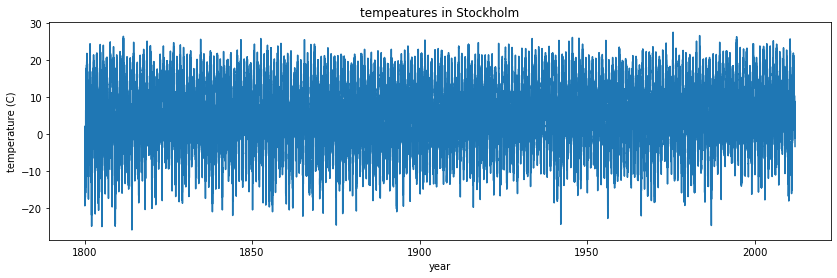

In [117]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

#### mean

In [103]:
# the temperature data is in column 3
mean(data[:,3])

6.197109684751585

The daily mean temperature in Stockholm over the last 200 years has been about 6.2 C.

#### standard deviations and variance

In [104]:
std(data[:,3]), var(data[:,3])

(8.282271621340573, 68.59602320966341)

#### min and max

In [105]:
# lowest daily average temperature
data[:,3].min()

-25.8

In [106]:
# highest daily average temperature
data[:,3].max()

28.3

#### sum, prod, and trace

In [107]:
d = arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [108]:
# sum up all elements
sum(d)

45

In [109]:
# product of all elements
prod(d+1)

3628800

In [110]:
# cummulative sum
cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [111]:
# cummulative product
cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [112]:
# same as: diag(A).sum()
trace(A)

110

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (technical term: pass by reference). 

In [113]:
A = array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [114]:
# now B is referring to the same array data as A 
B = A 

In [115]:
# changing B affects A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [116]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [ ]:
B = copy(A)

In [ ]:
# now, if we modify B, A is not affected
B[0,0] = -5

B

In [ ]:
A

## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.

## Versions

In [ ]:
%reload_ext version_information

%version_information numpy